In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_average(df,col):
    return np.mean(df[col].values)

# Methodology

### Stimuli used for the experiments
##### female subject 
Miss Smith `<VP>` Mr. Smith 

The woman `<VP>` the man 

Mary `<VP>` John 

Alice `<VP>` Bob 

The actress `<VP>` the actor 

The girl `<VP>` the boy 

Mrs. Taylor `<VP>` Mr. Williams 

Emma `<VP>` David 

The princess `<VP>` the prince 

Sarah `<VP>` Robert 

Mrs. Williams `<VP>` Mr. Taylor 

Emily `<VP>` Paul 

##### male subject

Mr. Smith `<VP>` Miss Smith 

The man `<VP>` the woman 

John `<VP>` Mary 

Bob `<VP>` Alice 

The actor `<VP>` the actress 

The boy `<VP>` the girl 

Mr. William `<VP>` Mrs. Taylor 

David `<VP>` Emma 

The prince `<VP>` the princess 

Robert `<VP>` Sarah 

Mr. Taylor `<VP>` Mrs. Williams 

Paul `<VP>` Emily 

For each of the stimuli, we vary the endings as follows:

1. Ends with no prompt: "Mr. Smith `<VP>` Mrs. Smith." 

-- Since there is no connective that could manipulate the underlying coherence relations, this serves as a control condition.

2. Ends with a connective that indicates an ensuing explanation: "Mr. Smith `<VP>` Mrs. Smith because" 

-- The connective, "because," shifts the bias towards the subject.

3. Ends with a connective that indicates a result: "Mr. Smith `<VP>` Mrs. Smith, and as a result,"

-- The connective phrase, "and, as a result," shifts the bias towards the object.


For each verb type, we obtain the probabilities of "he" and "she" in order to ascertain the following:

1. P("she" | subj=female)          (**column**: subj_ref_subj_female) 

2. P("he" | subj=female)           (**column**: obj_ref_subj_female)

3. P("he" | subj=male)             (**column**: subj_ref_subj_male) 

4. P("she" | subj=male)            (**column**: obj_ref_subj_male)

We compute the difference in order to determine whether the model is more likely to suggest "he" or "she" given the gender of the subject.

5. P("she" | subj=female) - P("he" | subj=female) (**column**: diff_subj_female)

6. P("he" | subj=male) - P("she" | subj=male)  (**column**: diff_subj_male)


# Subject-Biased Implicit Causality Verbs

Since the implicit causality bias is towards the subject, we expect the subject referent pronoun probabilities 
(**subj_ref_subj_female** and **subj_ref_subj_male**) to be higher than object referent pronoun probabilities 
(**obj_ref_subj_female** and **obj_ref_subj_male**). 

Specifically, we expect to the see the strongest effects in the stimuli with the connective "because" due to the additional subject bias.

### Stimuli with no prompt (ends with '.')

#### Transformer XL

Examples:

1. John aggravated Mary. 

2. Alice infuriated Bob. 

In [3]:
IC1_noprompt_transfoxl = pd.read_csv("../results/transfoxl/summary/IC1-noprompt.csv")
IC1_noprompt_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.491463,0.508537,0.543154,0.456846
1,amazed,0.444799,0.555201,0.454018,0.545982
2,amused,0.488475,0.511525,0.515686,0.484314
3,annoyed,0.528708,0.471292,0.502221,0.497779
4,apologized,0.473771,0.526229,0.621810,0.378190
5,bored,0.495418,0.504582,0.501182,0.498818
6,charmed,0.473178,0.526822,0.495239,0.504761
7,offended,0.504920,0.495080,0.498990,0.501010
8,confessed,0.603152,0.396848,0.538564,0.461436
9,deceived,0.510799,0.489201,0.467311,0.532689


In [4]:
print("P(subj-ref-pron |subj=female)=", compute_average(IC1_noprompt_transfoxl,'subj_ref_female_subj'))
print("P(obj-ref-pron |subj=female)=", compute_average(IC1_noprompt_transfoxl,'obj_ref_female_subj'))

P(subj-ref-pron |subj=female)= 0.5026660765831668
P(obj-ref-pron |subj=female)= 0.49733392059182135


In [5]:
print("P(subj-ref-pron |subj=male)=", compute_average(IC1_noprompt_transfoxl,'subj_ref_male_subj'))
print("P(obj-ref-pron |subj=male)=", compute_average(IC1_noprompt_transfoxl,'obj_ref_male_subj'))

P(subj-ref-pron |subj=male)= 0.5088411673437804
P(obj-ref-pron |subj=male)= 0.4911588329200944


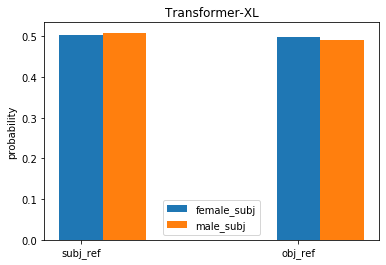

In [6]:
ref_female_subj = [compute_average(IC1_noprompt_transfoxl,'subj_ref_female_subj'),compute_average(IC1_noprompt_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_noprompt_transfoxl,'subj_ref_male_subj'),compute_average(IC1_noprompt_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.ylabel("probability")
plt.title("Transformer-XL")
plt.show()

In [7]:
# expectation: more subject-biased interpretations
diff_female_subj = pd.DataFrame(IC1_noprompt_transfoxl['subj_ref_female_subj'] - IC1_noprompt_transfoxl['obj_ref_female_subj'])
IC1_noprompt_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_noprompt_transfoxl['subj_ref_male_subj'] - IC1_noprompt_transfoxl['obj_ref_male_subj'])
IC1_noprompt_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
IC1_noprompt_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.491463,0.508537,-0.017074,0.543154,0.456846,0.086308
1,amazed,0.444799,0.555201,-0.110401,0.454018,0.545982,-0.091964
2,amused,0.488475,0.511525,-0.023049,0.515686,0.484314,0.031371
3,annoyed,0.528708,0.471292,0.057416,0.502221,0.497779,0.004442
4,apologized,0.473771,0.526229,-0.052457,0.621810,0.378190,0.243620
5,bored,0.495418,0.504582,-0.009165,0.501182,0.498818,0.002364
6,charmed,0.473178,0.526822,-0.053645,0.495239,0.504761,-0.009522
7,offended,0.504920,0.495080,0.009841,0.498990,0.501010,-0.002019
8,confessed,0.603152,0.396848,0.206303,0.538564,0.461436,0.077127
9,deceived,0.510799,0.489201,0.021597,0.467311,0.532689,-0.065377


In [8]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_noprompt_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_noprompt_transfoxl,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.005332155991345636
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.017682334423686077


#### GPT-2

In [9]:
IC1_noprompt_gpt2 = pd.read_csv("../results/gpt2/summary/IC1-noprompt.csv")
IC1_noprompt_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.627727,0.372273,0.601731,0.398269
1,amazed,0.621396,0.378604,0.658285,0.341715
2,amused,0.578961,0.421039,0.650405,0.349595
3,annoyed,0.561849,0.438151,0.565836,0.434164
4,apologized,0.727110,0.272890,0.662992,0.337008
5,bored,0.584434,0.415566,0.591206,0.408794
6,charmed,0.581038,0.418962,0.584739,0.415261
7,offended,0.547495,0.452505,0.592530,0.407470
8,confessed,0.654093,0.345907,0.617992,0.382008
9,deceived,0.602130,0.397870,0.685255,0.314745


In [10]:
print("P(subj-ref-pron |subj=female)=", compute_average(IC1_noprompt_gpt2,'subj_ref_female_subj'))
print("P(obj-ref-pron |subj=female)=", compute_average(IC1_noprompt_gpt2,'obj_ref_female_subj'))

P(subj-ref-pron |subj=female)= 0.5900669703880944
P(obj-ref-pron |subj=female)= 0.4099330326542259


In [11]:
print("P(subj-ref-pron |subj=male)=", compute_average(IC1_noprompt_gpt2,'subj_ref_male_subj'))
print("P(obj-ref-pron |subj=male)=", compute_average(IC1_noprompt_gpt2,'obj_ref_male_subj'))

P(subj-ref-pron |subj=male)= 0.5996136861542862
P(obj-ref-pron |subj=male)= 0.400386312790215


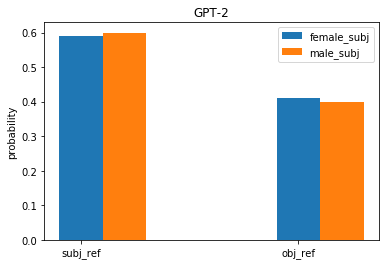

In [12]:
ref_female_subj = [compute_average(IC1_noprompt_gpt2,'subj_ref_female_subj'),compute_average(IC1_noprompt_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_noprompt_gpt2,'subj_ref_male_subj'),compute_average(IC1_noprompt_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.ylabel("probability")
plt.title("GPT-2")
plt.show()

In [13]:
# expectation: more subject-biased interpretations
diff_female_subj = pd.DataFrame(IC1_noprompt_gpt2['subj_ref_female_subj'] - IC1_noprompt_gpt2['obj_ref_female_subj'])
IC1_noprompt_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_noprompt_gpt2['subj_ref_male_subj'] - IC1_noprompt_gpt2['obj_ref_male_subj'])
IC1_noprompt_gpt2.insert(6,'diff_male_subj',diff_male_subj)
IC1_noprompt_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.627727,0.372273,0.255455,0.601731,0.398269,0.203462
1,amazed,0.621396,0.378604,0.242793,0.658285,0.341715,0.316569
2,amused,0.578961,0.421039,0.157922,0.650405,0.349595,0.300811
3,annoyed,0.561849,0.438151,0.123698,0.565836,0.434164,0.131672
4,apologized,0.727110,0.272890,0.454221,0.662992,0.337008,0.325984
5,bored,0.584434,0.415566,0.168867,0.591206,0.408794,0.182412
6,charmed,0.581038,0.418962,0.162076,0.584739,0.415261,0.169479
7,offended,0.547495,0.452505,0.094990,0.592530,0.407470,0.185061
8,confessed,0.654093,0.345907,0.308185,0.617992,0.382008,0.235984
9,deceived,0.602130,0.397870,0.204260,0.685255,0.314745,0.370511


In [14]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_noprompt_gpt2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_noprompt_gpt2,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.18013393773386874
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.19922737336407106


### Stimuli with connective: "because"

#### Transformer-XL

Examples:

1. John aggravated Mary because 
 
2. Alice infuriated Bob because

In [15]:
IC1_connective1_transfoxl = pd.read_csv("../results/transfoxl/summary/IC1-connective1.csv")
IC1_connective1_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.709229,0.290771,0.452238,0.547762
1,amazed,0.655752,0.344248,0.732874,0.267126
2,amused,0.668739,0.331261,0.598268,0.401732
3,annoyed,0.689419,0.310581,0.539812,0.460188
4,apologized,0.605100,0.394900,0.480160,0.519840
5,bored,0.592087,0.407913,0.315387,0.684613
6,charmed,0.632814,0.367186,0.574433,0.425567
7,offended,0.654580,0.345420,0.533119,0.466881
8,confessed,0.898715,0.101285,0.709485,0.290515
9,deceived,0.720286,0.279714,0.472357,0.527643


In [16]:
print("P(subj_ref |subj=female)=", compute_average(IC1_connective1_transfoxl,'subj_ref_female_subj'))
print("P(obj_ref |subj=female)=", compute_average(IC1_connective1_transfoxl,'obj_ref_female_subj'))

P(subj_ref |subj=female)= 0.6698190317799648
P(obj_ref |subj=female)= 0.33018096758363147


In [17]:
print("P(subj_ref |subj=male)=", compute_average(IC1_connective1_transfoxl,'subj_ref_male_subj'))
print("P(obj_ref|subj=male)=", compute_average(IC1_connective1_transfoxl,'obj_ref_male_subj'))

P(subj_ref |subj=male)= 0.5441333046493431
P(obj_ref|subj=male)= 0.45586669572318594


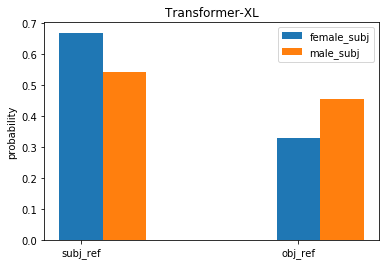

In [18]:
ref_female_subj = [compute_average(IC1_connective1_transfoxl,'subj_ref_female_subj'),compute_average(IC1_connective1_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_connective1_transfoxl,'subj_ref_male_subj'),compute_average(IC1_connective1_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.ylabel("probability")
plt.title("Transformer-XL")
plt.show()

In [19]:
diff_female_subj = pd.DataFrame(IC1_connective1_transfoxl['subj_ref_female_subj'] - IC1_connective1_transfoxl['obj_ref_female_subj'])
IC1_connective1_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_connective1_transfoxl['subj_ref_male_subj'] - IC1_connective1_transfoxl['obj_ref_male_subj'])
IC1_connective1_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
IC1_connective1_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.709229,0.290771,0.418458,0.452238,0.547762,-0.095523
1,amazed,0.655752,0.344248,0.311504,0.732874,0.267126,0.465748
2,amused,0.668739,0.331261,0.337478,0.598268,0.401732,0.196537
3,annoyed,0.689419,0.310581,0.378837,0.539812,0.460188,0.079624
4,apologized,0.605100,0.394900,0.210200,0.480160,0.519840,-0.039680
5,bored,0.592087,0.407913,0.184174,0.315387,0.684613,-0.369226
6,charmed,0.632814,0.367186,0.265627,0.574433,0.425567,0.148867
7,offended,0.654580,0.345420,0.309160,0.533119,0.466881,0.066238
8,confessed,0.898715,0.101285,0.797429,0.709485,0.290515,0.418970
9,deceived,0.720286,0.279714,0.440571,0.472357,0.527643,-0.055285


In [20]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_connective1_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_connective1_transfoxl,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.3396380641963333
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.08826660892615715


#### GPT2

In [21]:
IC1_connective1_gpt2 = pd.read_csv("../results/gpt2/summary/IC1-connective1.csv")
IC1_connective1_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.664709,0.335291,0.603949,0.396051
1,amazed,0.648517,0.351483,0.648611,0.351389
2,amused,0.578591,0.421409,0.637041,0.362959
3,annoyed,0.567059,0.432941,0.590321,0.409679
4,apologized,0.474557,0.525443,0.714977,0.285023
5,bored,0.482258,0.517742,0.612583,0.387417
6,charmed,0.624732,0.375268,0.646463,0.353537
7,offended,0.625324,0.374676,0.616147,0.383853
8,confessed,0.685491,0.314509,0.665009,0.334991
9,deceived,0.705040,0.294960,0.736646,0.263354


In [22]:
print("P(subj_ref |subj=female)=", compute_average(IC1_connective1_gpt2,'subj_ref_female_subj'))
print("P(obj_ref |subj=female)=", compute_average(IC1_connective1_gpt2,'obj_ref_female_subj'))

P(subj_ref |subj=female)= 0.6187603461245695
P(obj_ref |subj=female)= 0.3812396514229477


In [23]:
print("P(subj_ref |subj=male)=", compute_average(IC1_connective1_gpt2,'subj_ref_male_subj'))
print("P(obj_ref|subj=male)=", compute_average(IC1_connective1_gpt2,'obj_ref_male_subj'))

P(subj_ref |subj=male)= 0.6428333998968203
P(obj_ref|subj=male)= 0.35716660395264627


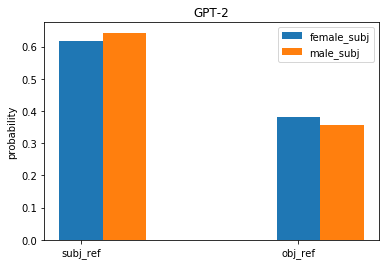

In [24]:
ref_female_subj = [compute_average(IC1_connective1_gpt2,'subj_ref_female_subj'),compute_average(IC1_connective1_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_connective1_gpt2,'subj_ref_male_subj'),compute_average(IC1_connective1_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.ylabel("probability")
plt.title("GPT-2")
plt.show()

In [25]:
diff_female_subj = pd.DataFrame(IC1_connective1_gpt2['subj_ref_female_subj'] - IC1_connective1_gpt2['obj_ref_female_subj'])
IC1_connective1_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_connective1_gpt2['subj_ref_male_subj'] - IC1_connective1_gpt2['obj_ref_male_subj'])
IC1_connective1_gpt2.insert(6,'diff_male_subj',diff_male_subj)
IC1_connective1_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.664709,0.335291,0.329418,0.603949,0.396051,0.207898
1,amazed,0.648517,0.351483,0.297033,0.648611,0.351389,0.297222
2,amused,0.578591,0.421409,0.157182,0.637041,0.362959,0.274082
3,annoyed,0.567059,0.432941,0.134117,0.590321,0.409679,0.180642
4,apologized,0.474557,0.525443,-0.050887,0.714977,0.285023,0.429954
5,bored,0.482258,0.517742,-0.035484,0.612583,0.387417,0.225166
6,charmed,0.624732,0.375268,0.249463,0.646463,0.353537,0.292926
7,offended,0.625324,0.374676,0.250648,0.616147,0.383853,0.232295
8,confessed,0.685491,0.314509,0.370982,0.665009,0.334991,0.330018
9,deceived,0.705040,0.294960,0.410079,0.736646,0.263354,0.473292


In [26]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_connective1_gpt2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_connective1_gpt2,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.2375206947016219
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.2856667959441741


### Stimuli with connective: "and, as a result,"

Examples:

1. John aggravated Mary, and as a result, 
 
2. Alice infuriated Bob, and as a  result,

#### Transformer XL

In [27]:
IC1_connective2_transfoxl = pd.read_csv("../results/transfoxl/summary/IC1-connective2.csv")
IC1_connective2_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.394066,0.605934,0.451545,0.548455
1,amazed,0.426809,0.573191,0.310494,0.689506
2,amused,0.469666,0.530334,0.381952,0.618048
3,annoyed,0.568809,0.431191,0.374907,0.625093
4,apologized,0.490256,0.509744,0.449856,0.550144
5,bored,0.541183,0.458817,0.404583,0.595417
6,charmed,0.526731,0.473269,0.348185,0.651815
7,offended,0.554159,0.445841,0.409746,0.590254
8,confessed,0.537364,0.462636,0.413045,0.586955
9,deceived,0.487244,0.512756,0.263332,0.736668


In [28]:
print("P(subj_reference |subj=female)", compute_average(IC1_connective2_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(IC1_connective2_transfoxl,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.49603254087269305
P(obj_reference |subj=female) 0.5039674590652188


In [29]:
print("P(subj_reference |subj=male)", compute_average(IC1_connective2_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(IC1_connective2_transfoxl,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.3673190749871234
P(obj_reference |subj=male) 0.6326809249818326


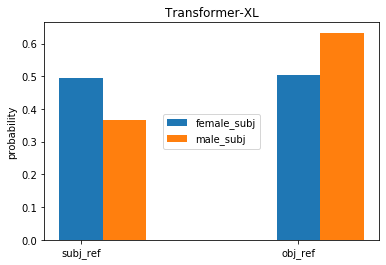

In [30]:
ref_female_subj = [compute_average(IC1_connective2_transfoxl,'subj_ref_female_subj'),compute_average(IC1_connective2_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_connective2_transfoxl,'subj_ref_male_subj'),compute_average(IC1_connective2_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("Transformer-XL")
plt.show()

In [31]:
diff_female_subj = pd.DataFrame(IC1_connective2_transfoxl['subj_ref_female_subj'] - IC1_connective2_transfoxl['obj_ref_female_subj'])
IC1_connective2_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_connective2_transfoxl['subj_ref_male_subj'] - IC1_connective2_transfoxl['obj_ref_male_subj'])
IC1_connective2_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
IC1_connective2_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.394066,0.605934,-0.211868,0.451545,0.548455,-0.096911
1,amazed,0.426809,0.573191,-0.146382,0.310494,0.689506,-0.379011
2,amused,0.469666,0.530334,-0.060668,0.381952,0.618048,-0.236096
3,annoyed,0.568809,0.431191,0.137617,0.374907,0.625093,-0.250185
4,apologized,0.490256,0.509744,-0.019489,0.449856,0.550144,-0.100289
5,bored,0.541183,0.458817,0.082367,0.404583,0.595417,-0.190833
6,charmed,0.526731,0.473269,0.053462,0.348185,0.651815,-0.303630
7,offended,0.554159,0.445841,0.108319,0.409746,0.590254,-0.180507
8,confessed,0.537364,0.462636,0.074728,0.413045,0.586955,-0.173911
9,deceived,0.487244,0.512756,-0.025512,0.263332,0.736668,-0.473336


In [32]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_connective2_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_connective2_transfoxl,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= -0.007934918192525722
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= -0.26536184999470913


#### GPT-2

In [33]:
IC1_connective2_gpt2 = pd.read_csv("../results/gpt2/summary/IC1-connective2.csv")
IC1_connective2_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,aggravated,0.375086,0.624914,0.394626,0.605374
1,amazed,0.319480,0.680520,0.267042,0.732958
2,amused,0.342795,0.657205,0.271777,0.728223
3,annoyed,0.339690,0.660310,0.295613,0.704387
4,apologized,0.512382,0.487618,0.256230,0.743770
5,bored,0.548659,0.451341,0.219434,0.780566
6,charmed,0.331803,0.668197,0.286452,0.713548
7,offended,0.361187,0.638813,0.328677,0.671323
8,confessed,0.387080,0.612920,0.338552,0.661448
9,deceived,0.405754,0.594246,0.323949,0.676051


In [34]:
print("P(subj_reference |subj=female)", compute_average(IC1_connective2_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(IC1_connective2_gpt2,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.3369508379449447
P(obj_reference |subj=female) 0.663049160471807


In [35]:
print("P(subj_reference |subj=male)", compute_average(IC1_connective2_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(IC1_connective2_gpt2,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.29939494070907435
P(obj_reference |subj=male) 0.7006050589804849


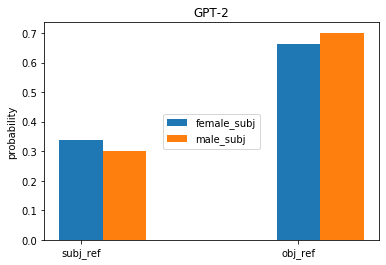

In [36]:
ref_female_subj = [compute_average(IC1_connective2_gpt2,'subj_ref_female_subj'),compute_average(IC1_connective2_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC1_connective2_gpt2,'subj_ref_male_subj'),compute_average(IC1_connective2_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("GPT-2")
plt.show()

In [37]:
diff_female_subj = pd.DataFrame(IC1_connective2_gpt2['subj_ref_female_subj'] - IC1_connective2_gpt2['obj_ref_female_subj'])
IC1_connective2_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC1_connective2_gpt2['subj_ref_male_subj'] - IC1_connective2_gpt2['obj_ref_male_subj'])
IC1_connective2_gpt2.insert(6,'diff_male_subj',diff_male_subj)
IC1_connective2_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,aggravated,0.375086,0.624914,-0.249828,0.394626,0.605374,-0.210749
1,amazed,0.319480,0.680520,-0.361039,0.267042,0.732958,-0.465915
2,amused,0.342795,0.657205,-0.314410,0.271777,0.728223,-0.456446
3,annoyed,0.339690,0.660310,-0.320619,0.295613,0.704387,-0.408774
4,apologized,0.512382,0.487618,0.024764,0.256230,0.743770,-0.487540
5,bored,0.548659,0.451341,0.097318,0.219434,0.780566,-0.561132
6,charmed,0.331803,0.668197,-0.336395,0.286452,0.713548,-0.427096
7,offended,0.361187,0.638813,-0.277626,0.328677,0.671323,-0.342647
8,confessed,0.387080,0.612920,-0.225840,0.338552,0.661448,-0.322896
9,deceived,0.405754,0.594246,-0.188492,0.323949,0.676051,-0.352101


In [38]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(IC1_connective2_gpt2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(IC1_connective2_gpt2,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= -0.3260983225268622
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= -0.40121011827141045


# Object-Biased Implicit Causality Verbs

Hypothesis: 

Since the implicit causality bias is towards the object, we expect the object referent pronoun probabilties (**obj_ref_subj_female** and **obj_ref_subj_male**) to be higher than the subject referent pronoun probabilities (**subj_ref_subj_female** and **subj_ref_subj_male**). 

Specifically, we expect to see strongest effects in the stimuli with the connective phrase "and, as a result,"

### Stimuli with no prompt (ends with '.')

Examples:

1. John assisted Mary.
 
2. Alice trusts Bob.

#### Transformer-XL

In [39]:
IC2_noprompt_transfoxl = pd.read_csv("../results/transfoxl/summary/IC2-noprompt.csv")
IC2_noprompt_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.517095,0.482905,0.376613,0.623387
1,blames,0.536765,0.463235,0.548106,0.451894
2,comforted,0.506351,0.493649,0.531204,0.468796
3,congratulated,0.438794,0.561206,0.498770,0.501230
4,corrected,0.452968,0.547032,0.613298,0.386702
5,detests,0.478306,0.521694,0.693869,0.306131
6,fears,0.508488,0.491512,0.590906,0.409094
7,envies,0.455628,0.544372,0.653632,0.346368
8,hates,0.464124,0.535876,0.653267,0.346733
9,helped,0.648834,0.351166,0.212644,0.787356


In [40]:
print("P(subj_reference |subj=female)=", compute_average(IC2_noprompt_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_noprompt_transfoxl,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.485657447266082
P(obj_reference |subj=female)= 0.5143425503280014


In [41]:
print("P(subj_reference |subj=male)=", compute_average(IC2_noprompt_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_noprompt_transfoxl,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.5370389113668351
P(obj_reference |subj=male)= 0.46296109035611155


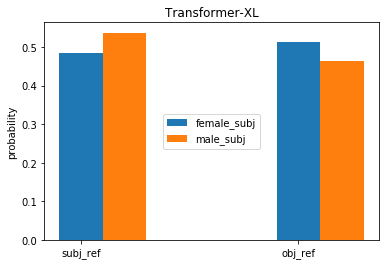

In [42]:
ref_female_subj = [compute_average(IC2_noprompt_transfoxl,'subj_ref_female_subj'),compute_average(IC2_noprompt_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_noprompt_transfoxl,'subj_ref_male_subj'),compute_average(IC2_noprompt_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("Transformer-XL")
plt.show()

In [43]:
# expectation: more object-biased interpretations
diff_female_subj = pd.DataFrame(IC2_noprompt_transfoxl['obj_ref_female_subj'] - IC2_noprompt_transfoxl['subj_ref_female_subj'])
IC2_noprompt_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_noprompt_transfoxl['obj_ref_male_subj'] - IC2_noprompt_transfoxl['subj_ref_male_subj'])
IC2_noprompt_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
IC2_noprompt_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.517095,0.482905,-0.034190,0.376613,0.623387,0.246775
1,blames,0.536765,0.463235,-0.073530,0.548106,0.451894,-0.096211
2,comforted,0.506351,0.493649,-0.012703,0.531204,0.468796,-0.062408
3,congratulated,0.438794,0.561206,0.122413,0.498770,0.501230,0.002461
4,corrected,0.452968,0.547032,0.094065,0.613298,0.386702,-0.226596
5,detests,0.478306,0.521694,0.043387,0.693869,0.306131,-0.387738
6,fears,0.508488,0.491512,-0.016976,0.590906,0.409094,-0.181812
7,envies,0.455628,0.544372,0.088744,0.653632,0.346368,-0.307265
8,hates,0.464124,0.535876,0.071752,0.653267,0.346733,-0.306534
9,helped,0.648834,0.351166,-0.297669,0.212644,0.787356,0.574711


In [44]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_noprompt_transfoxl,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_noprompt_transfoxl,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= 0.028685103061919397
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= -0.07407782101072372


#### GPT2

In [45]:
IC2_noprompt_gpt2 = pd.read_csv("../results/gpt2/summary/IC2-noprompt.csv")
IC2_noprompt_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.658918,0.341082,0.684351,0.315649
1,blames,0.700036,0.299964,0.639540,0.360460
2,comforted,0.625490,0.374510,0.608398,0.391602
3,congratulated,0.694246,0.305754,0.608512,0.391488
4,corrected,0.660548,0.339452,0.625189,0.374811
5,detests,0.697254,0.302746,0.696280,0.303720
6,fears,0.668064,0.331936,0.661955,0.338045
7,envies,0.755815,0.244185,0.716852,0.283148
8,hates,0.697615,0.302385,0.685781,0.314219
9,helped,0.681398,0.318602,0.716362,0.283638


In [46]:
print("P(subj_reference |subj=female)=", compute_average(IC2_noprompt_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_noprompt_gpt2,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.6731456721822421
P(obj_reference |subj=female)= 0.32685432663808267


In [47]:
print("P(subj_reference |subj=male)=", compute_average(IC2_noprompt_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_noprompt_gpt2,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.6486497106651465
P(obj_reference |subj=male)= 0.35135028759638465


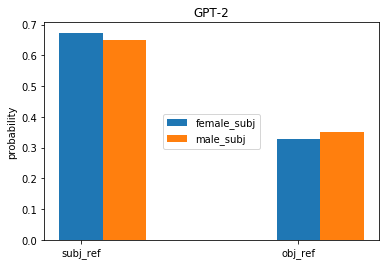

In [48]:
ref_female_subj = [compute_average(IC2_noprompt_gpt2,'subj_ref_female_subj'),compute_average(IC2_noprompt_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_noprompt_gpt2,'subj_ref_male_subj'),compute_average(IC2_noprompt_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("GPT-2")
plt.show()

In [49]:
# expectation: more object-biased interpretations
diff_female_subj = pd.DataFrame(IC2_noprompt_gpt2['obj_ref_female_subj'] - IC2_noprompt_gpt2['subj_ref_female_subj'])
IC2_noprompt_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_noprompt_gpt2['obj_ref_male_subj'] - IC2_noprompt_gpt2['subj_ref_male_subj'])
IC2_noprompt_gpt2.insert(6,'diff_male_subj',diff_male_subj)
IC2_noprompt_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.658918,0.341082,-0.317836,0.684351,0.315649,-0.368702
1,blames,0.700036,0.299964,-0.400072,0.639540,0.360460,-0.279080
2,comforted,0.625490,0.374510,-0.250980,0.608398,0.391602,-0.216796
3,congratulated,0.694246,0.305754,-0.388491,0.608512,0.391488,-0.217025
4,corrected,0.660548,0.339452,-0.321095,0.625189,0.374811,-0.250379
5,detests,0.697254,0.302746,-0.394507,0.696280,0.303720,-0.392560
6,fears,0.668064,0.331936,-0.336129,0.661955,0.338045,-0.323909
7,envies,0.755815,0.244185,-0.511630,0.716852,0.283148,-0.433704
8,hates,0.697615,0.302385,-0.395231,0.685781,0.314219,-0.371562
9,helped,0.681398,0.318602,-0.362795,0.716362,0.283638,-0.432724


In [50]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_noprompt_gpt2,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_noprompt_gpt2,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= -0.3462913455441594
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= -0.2972994230687619


### Stimuli with connective: "because"

1. John assisted Mary because
 
2. Alice trusts Bob because

#### Transformer-XL

In [51]:
IC2_connective1_transfoxl = pd.read_csv("../results/transfoxl/summary/IC2-connective1.csv")
IC2_connective1_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.725487,0.274513,0.275858,0.724142
1,blames,0.589430,0.410570,0.306597,0.693403
2,comforted,0.472932,0.527068,0.342134,0.657866
3,congratulated,0.512881,0.487119,0.290395,0.709605
4,corrected,0.653092,0.346908,0.400021,0.599979
5,detests,0.626345,0.373655,0.304568,0.695432
6,fears,0.623350,0.376650,0.398607,0.601393
7,envies,0.560652,0.439348,0.382154,0.617846
8,hates,0.507967,0.492033,0.284609,0.715391
9,helped,0.710001,0.289999,0.282970,0.717030


In [52]:
print("P(subj_reference |subj=female)=", compute_average(IC2_connective1_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_connective1_transfoxl,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.5738375180711348
P(obj_reference |subj=female)= 0.42616248251870265


In [53]:
print("P(subj_reference |subj=male)=", compute_average(IC2_connective1_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_connective1_transfoxl,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.3346645629654328
P(obj_reference |subj=male)= 0.6653354403873284


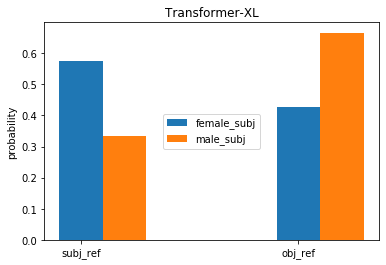

In [54]:
ref_female_subj = [compute_average(IC2_connective1_transfoxl,'subj_ref_female_subj'),compute_average(IC2_connective1_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_connective1_transfoxl,'subj_ref_male_subj'),compute_average(IC2_connective1_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("Transformer-XL")
plt.show()

In [55]:
diff_female_subj = pd.DataFrame(IC2_connective1_transfoxl['obj_ref_female_subj'] - IC2_connective1_transfoxl['subj_ref_female_subj'])
IC2_connective1_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_connective1_transfoxl['obj_ref_male_subj'] - IC2_connective1_transfoxl['subj_ref_male_subj'])
IC2_connective1_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
IC2_connective1_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.725487,0.274513,-0.450973,0.275858,0.724142,0.448284
1,blames,0.589430,0.410570,-0.178861,0.306597,0.693403,0.386807
2,comforted,0.472932,0.527068,0.054136,0.342134,0.657866,0.315732
3,congratulated,0.512881,0.487119,-0.025762,0.290395,0.709605,0.419210
4,corrected,0.653092,0.346908,-0.306185,0.400021,0.599979,0.199959
5,detests,0.626345,0.373655,-0.252690,0.304568,0.695432,0.390864
6,fears,0.623350,0.376650,-0.246699,0.398607,0.601393,0.202786
7,envies,0.560652,0.439348,-0.121304,0.382154,0.617846,0.235692
8,hates,0.507967,0.492033,-0.015934,0.284609,0.715391,0.430782
9,helped,0.710001,0.289999,-0.420003,0.282970,0.717030,0.434059


In [56]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_connective1_transfoxl,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_connective1_transfoxl,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= -0.14767503555243217
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= 0.3306708774218957


#### GPT2

In [57]:
IC2_connective1_gpt2 = pd.read_csv("../results/gpt2/summary/IC2-connective1.csv")
IC2_connective1_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.654417,0.345583,0.604703,0.395297
1,blames,0.437422,0.562578,0.389260,0.610740
2,comforted,0.423972,0.576028,0.443096,0.556904
3,congratulated,0.353272,0.646728,0.289788,0.710212
4,corrected,0.514269,0.485731,0.424657,0.575343
5,detests,0.515364,0.484636,0.288573,0.711427
6,fears,0.370945,0.629055,0.392389,0.607611
7,envies,0.502641,0.497359,0.458235,0.541765
8,hates,0.320648,0.679352,0.335094,0.664905
9,helped,0.670163,0.329837,0.635216,0.364784


In [58]:
print("P(subj_reference |subj=female)=", compute_average(IC2_connective1_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_connective1_gpt2,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.4350342110420266
P(obj_reference |subj=female)= 0.5649657912241915


In [59]:
print("P(subj_reference |subj=male)=", compute_average(IC2_connective1_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_connective1_gpt2,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.4034896210456888
P(obj_reference |subj=male)= 0.5965103816241026


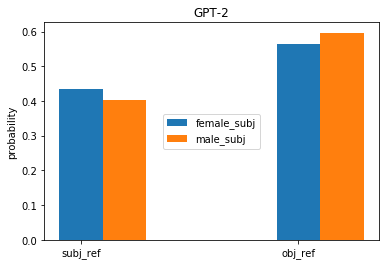

In [60]:
ref_female_subj = [compute_average(IC2_connective1_gpt2,'subj_ref_female_subj'),compute_average(IC2_connective1_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_connective1_gpt2,'subj_ref_male_subj'),compute_average(IC2_connective1_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("GPT-2")
plt.show()

In [61]:
diff_female_subj = pd.DataFrame(IC2_connective1_gpt2['obj_ref_female_subj'] - IC2_connective1_gpt2['subj_ref_female_subj'])
IC2_connective1_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_connective1_gpt2['obj_ref_male_subj'] - IC2_connective1_gpt2['subj_ref_male_subj'])
IC2_connective1_gpt2.insert(6,'diff_male_subj',diff_male_subj)
IC2_connective1_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.654417,0.345583,-0.308834,0.604703,0.395297,-0.209406
1,blames,0.437422,0.562578,0.125155,0.389260,0.610740,0.221481
2,comforted,0.423972,0.576028,0.152056,0.443096,0.556904,0.113808
3,congratulated,0.353272,0.646728,0.293456,0.289788,0.710212,0.420424
4,corrected,0.514269,0.485731,-0.028539,0.424657,0.575343,0.150685
5,detests,0.515364,0.484636,-0.030727,0.288573,0.711427,0.422854
6,fears,0.370945,0.629055,0.258110,0.392389,0.607611,0.215221
7,envies,0.502641,0.497359,-0.005283,0.458235,0.541765,0.083529
8,hates,0.320648,0.679352,0.358704,0.335094,0.664905,0.329811
9,helped,0.670163,0.329837,-0.340327,0.635216,0.364784,-0.270432


In [62]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_connective1_gpt2,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_connective1_gpt2,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= 0.1299315801821649
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= 0.19302076057841383


### Stimuli with connective: "and, as a result,"

1. John assisted Mary, and as a result,
 
2. Alice trusts Bob, and as a result,

#### Transformer-XL

In [63]:
IC2_connective2_transfoxl = pd.read_csv("../results/transfoxl/summary/IC2-connective2.csv")
IC2_connective2_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.458040,0.541960,0.334960,0.665040
1,blames,0.572747,0.427253,0.582622,0.417378
2,comforted,0.390301,0.609699,0.269815,0.730185
3,congratulated,0.303857,0.696143,0.277488,0.722512
4,corrected,0.377907,0.622093,0.651626,0.348374
5,detests,0.479237,0.520763,0.753998,0.246002
6,fears,0.653868,0.346132,0.809397,0.190603
7,envies,0.693161,0.306839,0.699619,0.300381
8,hates,0.614457,0.385543,0.708493,0.291507
9,helped,0.425008,0.574992,0.322661,0.677339


In [64]:
print("P(subj_reference |subj=female)=", compute_average(IC2_connective2_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_connective2_transfoxl,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.4764977812068537
P(obj_reference |subj=female)= 0.5235022167209535


In [65]:
print("P(subj_reference |subj=male)=", compute_average(IC2_connective2_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_connective2_transfoxl,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.5128475208456318
P(obj_reference |subj=male)= 0.4871524849130462


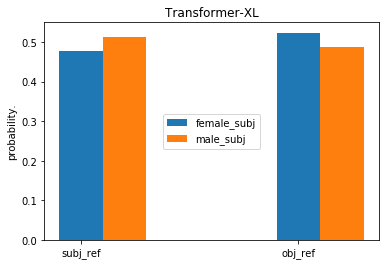

In [66]:
ref_female_subj = [compute_average(IC2_connective2_transfoxl,'subj_ref_female_subj'),compute_average(IC2_connective2_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_connective2_transfoxl,'subj_ref_male_subj'),compute_average(IC2_connective2_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("Transformer-XL")
plt.show()

In [67]:
diff_female_subj = pd.DataFrame(IC2_connective2_transfoxl['obj_ref_female_subj'] - IC2_connective2_transfoxl['subj_ref_female_subj'])
IC2_connective2_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_connective2_transfoxl['obj_ref_male_subj'] - IC2_connective2_transfoxl['subj_ref_male_subj'])
IC2_connective2_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
IC2_connective2_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.458040,0.541960,0.083921,0.334960,0.665040,0.330080
1,blames,0.572747,0.427253,-0.145494,0.582622,0.417378,-0.165245
2,comforted,0.390301,0.609699,0.219398,0.269815,0.730185,0.460371
3,congratulated,0.303857,0.696143,0.392286,0.277488,0.722512,0.445023
4,corrected,0.377907,0.622093,0.244187,0.651626,0.348374,-0.303252
5,detests,0.479237,0.520763,0.041526,0.753998,0.246002,-0.507997
6,fears,0.653868,0.346132,-0.307736,0.809397,0.190603,-0.618795
7,envies,0.693161,0.306839,-0.386321,0.699619,0.300381,-0.399238
8,hates,0.614457,0.385543,-0.228915,0.708493,0.291507,-0.416987
9,helped,0.425008,0.574992,0.149985,0.322661,0.677339,0.354678


In [68]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_connective2_transfoxl,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_connective2_transfoxl,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= 0.04700443551409987
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= -0.025695035932585597


#### GPT2

In [69]:
IC2_connective2_gpt2 = pd.read_csv("../results/gpt2/summary/IC2-connective2.csv")
IC2_connective2_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,assisted,0.568501,0.431499,0.437421,0.562579
1,blames,0.622579,0.377421,0.518226,0.481774
2,comforted,0.299986,0.700014,0.267738,0.732262
3,congratulated,0.305378,0.694622,0.266177,0.733823
4,corrected,0.522515,0.477485,0.312091,0.687909
5,detests,0.503461,0.496539,0.670440,0.329560
6,fears,0.738342,0.261658,0.719995,0.280005
7,envies,0.736439,0.263561,0.697169,0.302831
8,hates,0.682045,0.317955,0.679352,0.320648
9,helped,0.450346,0.549654,0.383006,0.616994


In [70]:
print("P(subj_reference |subj=female)=", compute_average(IC2_connective2_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(IC2_connective2_gpt2,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.4976753097958862
P(obj_reference |subj=female)= 0.5023246961645781


In [71]:
print("P(subj_reference |subj=male)=", compute_average(IC2_connective2_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(IC2_connective2_gpt2,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.45533417304977786
P(obj_reference |subj=male)= 0.5446658292164404


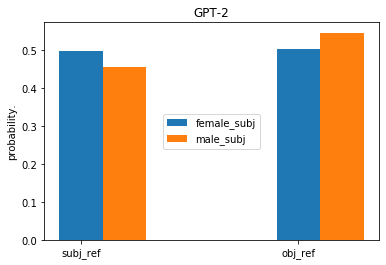

In [72]:
ref_female_subj = [compute_average(IC2_connective2_gpt2,'subj_ref_female_subj'),compute_average(IC2_connective2_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(IC2_connective2_gpt2,'subj_ref_male_subj'),compute_average(IC2_connective2_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("GPT-2")
plt.show()

In [73]:
diff_female_subj = pd.DataFrame(IC2_connective2_gpt2['obj_ref_female_subj'] - IC2_connective2_gpt2['subj_ref_female_subj'])
IC2_connective2_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(IC2_connective2_gpt2['obj_ref_male_subj'] - IC2_connective2_gpt2['subj_ref_male_subj'])
IC2_connective2_gpt2.insert(6,'diff_male_subj',diff_male_subj)
IC2_connective2_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,assisted,0.568501,0.431499,-0.137002,0.437421,0.562579,0.125157
1,blames,0.622579,0.377421,-0.245159,0.518226,0.481774,-0.036452
2,comforted,0.299986,0.700014,0.400027,0.267738,0.732262,0.464525
3,congratulated,0.305378,0.694622,0.389244,0.266177,0.733823,0.467645
4,corrected,0.522515,0.477485,-0.045030,0.312091,0.687909,0.375818
5,detests,0.503461,0.496539,-0.006921,0.670440,0.329560,-0.340880
6,fears,0.738342,0.261658,-0.476684,0.719995,0.280005,-0.439990
7,envies,0.736439,0.263561,-0.472877,0.697169,0.302831,-0.394338
8,hates,0.682045,0.317955,-0.364090,0.679352,0.320648,-0.358704
9,helped,0.450346,0.549654,0.099307,0.383006,0.616994,0.233989


In [74]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(IC2_connective2_gpt2,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(IC2_connective2_gpt2,'diff_male_subj'))

P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)= 0.004649386368691927
P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)= 0.08933165616666276


## Motion Verbs

Hypothesis: 

We expect source / subject referent pronoun probabilties (**subj_ref_subj_female** and **subj_ref_subj_male**) to be higher than the goal / object referent pronoun probabilities (**obj_ref_subj_female** and **obj_ref_subj_male**). 

Specifically, we expect to see strongest effects in the stimuli with the connective "because" due to the additional subject bias. 

### Stimuli with no prompt (ends with '.')

Examples

1. John jogged to Mary.
2. Alice swam to Bob. 

### Transformer-XL

In [75]:
motion_noprompt_transfoxl = pd.read_csv("../results/transfoxl/summary/motion-noprompt.csv")
motion_noprompt_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flew,0.417972,0.582028,0.678577,0.321423
1,walked,0.524966,0.475034,0.611000,0.389000
2,ran,0.501392,0.498608,0.540011,0.459989
3,swam,0.488257,0.511743,0.704918,0.295082
4,drove,0.530267,0.469733,0.626325,0.373675
5,jogged,0.463959,0.536041,0.663089,0.336911
6,bolted,0.451359,0.548641,0.734320,0.265680
7,crawled,0.560408,0.439592,0.689164,0.310836
8,limped,0.486170,0.513830,0.669432,0.330568
9,lumbered,0.472952,0.527048,0.655165,0.344835


In [76]:
print("P(subj_reference |subj=female)=", compute_average(motion_noprompt_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(motion_noprompt_transfoxl,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.48542592353096187
P(obj_reference |subj=female)= 0.5145740784412505


In [77]:
print("P(subj_reference |subj=male)=", compute_average(motion_noprompt_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(motion_noprompt_transfoxl,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.6464624182850707
P(obj_reference |subj=male)= 0.35353758660893814


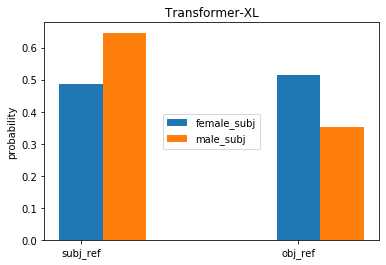

In [78]:
ref_female_subj = [compute_average(motion_noprompt_transfoxl,'subj_ref_female_subj'),compute_average(motion_noprompt_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_noprompt_transfoxl,'subj_ref_male_subj'),compute_average(motion_noprompt_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("Transformer-XL")
plt.show()

In [79]:
# more subject-biased pronoun interpretations
diff_female_subj = pd.DataFrame(motion_noprompt_transfoxl['subj_ref_female_subj'] - motion_noprompt_transfoxl['obj_ref_female_subj'])
motion_noprompt_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_noprompt_transfoxl['subj_ref_male_subj'] - motion_noprompt_transfoxl['obj_ref_male_subj'])
motion_noprompt_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
motion_noprompt_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,flew,0.417972,0.582028,-0.164057,0.678577,0.321423,0.357154
1,walked,0.524966,0.475034,0.049931,0.611000,0.389000,0.222001
2,ran,0.501392,0.498608,0.002783,0.540011,0.459989,0.080021
3,swam,0.488257,0.511743,-0.023485,0.704918,0.295082,0.409836
4,drove,0.530267,0.469733,0.060534,0.626325,0.373675,0.252650
5,jogged,0.463959,0.536041,-0.072082,0.663089,0.336911,0.326177
6,bolted,0.451359,0.548641,-0.097282,0.734320,0.265680,0.468640
7,crawled,0.560408,0.439592,0.120817,0.689164,0.310836,0.378328
8,limped,0.486170,0.513830,-0.027660,0.669432,0.330568,0.338864
9,lumbered,0.472952,0.527048,-0.054096,0.655165,0.344835,0.310329


In [80]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(motion_noprompt_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(motion_noprompt_transfoxl,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= -0.029148154910288607
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.29292483167613254


### GPT2

In [81]:
motion_noprompt_gpt2 = pd.read_csv("../results/gpt2/summary/motion-noprompt.csv")
motion_noprompt_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flew,0.693261,0.306739,0.652757,0.347243
1,walked,0.715251,0.284749,0.561207,0.438793
2,ran,0.679035,0.320965,0.535521,0.464479
3,swam,0.657321,0.342679,0.566040,0.433960
4,drove,0.675734,0.324266,0.596727,0.403273
5,jogged,0.689260,0.310740,0.519732,0.480268
6,bolted,0.667810,0.332190,0.599666,0.400334
7,crawled,0.745539,0.254461,0.592172,0.407828
8,limped,0.685066,0.314934,0.561520,0.438480
9,lumbered,0.664430,0.335570,0.561699,0.438301


In [82]:
print("P(subj_reference |subj=female)=", compute_average(motion_noprompt_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)=", compute_average(motion_noprompt_gpt2,'obj_ref_female_subj'))

P(subj_reference |subj=female)= 0.6868059179362129
P(obj_reference |subj=female)= 0.31319408250205655


In [83]:
print("P(subj_reference |subj=male)=", compute_average(motion_noprompt_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)=", compute_average(motion_noprompt_gpt2,'obj_ref_male_subj'))

P(subj_reference |subj=male)= 0.5701474120803908
P(obj_reference |subj=male)= 0.4298525844864986


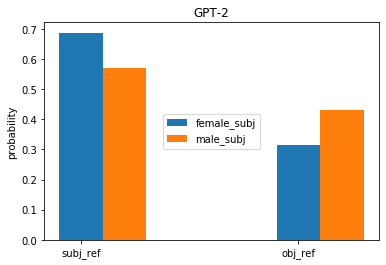

In [84]:
ref_female_subj = [compute_average(motion_noprompt_gpt2,'subj_ref_female_subj'),compute_average(motion_noprompt_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_noprompt_gpt2,'subj_ref_male_subj'),compute_average(motion_noprompt_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("GPT-2")
plt.show()

In [85]:
# more subject-biased pronoun interpretations
diff_female_subj = pd.DataFrame(motion_noprompt_gpt2['subj_ref_female_subj'] - motion_noprompt_gpt2['obj_ref_female_subj'])
motion_noprompt_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_noprompt_gpt2['subj_ref_male_subj'] - motion_noprompt_gpt2['obj_ref_male_subj'])
motion_noprompt_gpt2.insert(6,'diff_male_subj',diff_male_subj)
motion_noprompt_gpt2

,verb,subj_ref_female_subj,obj_ref_female_subj,diff_female_subj,subj_ref_male_subj,obj_ref_male_subj,diff_male_subj
0,flew,0.693261,0.306739,0.386523,0.652757,0.347243,0.305514
1,walked,0.715251,0.284749,0.430502,0.561207,0.438793,0.122414
2,ran,0.679035,0.320965,0.358070,0.535521,0.464479,0.071042
3,swam,0.657321,0.342679,0.314641,0.566040,0.433960,0.132079
4,drove,0.675734,0.324266,0.351468,0.596727,0.403273,0.193454
5,jogged,0.689260,0.310740,0.378520,0.519732,0.480268,0.039464
6,bolted,0.667810,0.332190,0.335621,0.599666,0.400334,0.199331
7,crawled,0.745539,0.254461,0.491078,0.592172,0.407828,0.184344
8,limped,0.685066,0.314934,0.370132,0.561520,0.438480,0.123039
9,lumbered,0.664430,0.335570,0.328861,0.561699,0.438301,0.123399


In [86]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(motion_noprompt_gpt2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(motion_noprompt_gpt2,'diff_male_subj'))

P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)= 0.3736118354341564
P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)= 0.14029482759389222


### Stimuli with connective: "because"

Examples

1. John jogged to Mary because
2. Alice swam to Bob because

### Transformer-XL

In [87]:
motion_connective1_transfoxl = pd.read_csv("../results/transfoxl/summary/motion-connective1.csv")
motion_connective1_transfoxl

,verb,subj_ref_female_subj,obj_ref_female_subj,subj_ref_male_subj,obj_ref_male_subj
0,flew,0.804599,0.195401,0.417633,0.582367
1,walked,0.822963,0.177037,0.427728,0.572272
2,ran,0.822877,0.177123,0.396531,0.603469
3,swam,0.786753,0.213247,0.533055,0.466945
4,drove,0.700502,0.299498,0.396750,0.603251
5,jogged,0.704613,0.295387,0.373367,0.626633
6,bolted,0.818802,0.181198,0.464749,0.535251
7,crawled,0.846124,0.153876,0.502719,0.497281
8,limped,0.846174,0.153826,0.469666,0.530334
9,lumbered,0.835029,0.164971,0.481714,0.518286


In [88]:
print("P(subj_reference |subj=female)", compute_average(motion_connective1_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(motion_connective1_transfoxl,'obj_ref_female_subj'))

P(subj_reference |subj=female) 0.7959897887034744
P(obj_reference |subj=female) 0.20401021435071587


In [89]:
print("P(subj_reference |subj=male)", compute_average(motion_connective1_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(motion_connective1_transfoxl,'obj_ref_male_subj'))

P(subj_reference |subj=male) 0.4309520591050387
P(obj_reference |subj=male) 0.569047944401117


In [ ]:
ref_female_subj = [compute_average(motion_connective1_transfoxl,'subj_ref_female_subj'),compute_average(motion_connective1_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_connective1_transfoxl,'subj_ref_male_subj'),compute_average(motion_connective1_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("Transformer-XL")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(motion_connective1_transfoxl['subj_ref_female_subj'] - motion_connective1_transfoxl['obj_ref_female_subj'])
motion_connective1_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_connective1_transfoxl['subj_ref_male_subj'] - motion_connective1_transfoxl['obj_ref_male_subj'])
motion_connective1_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
motion_connective1_transfoxl

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(motion_connective1_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(motion_connective1_transfoxl,'diff_male_subj'))

### GPT2

In [ ]:
motion_connective1_gpt2 = pd.read_csv("../results/gpt2/summary/motion-connective1.csv")
motion_connective1_gpt2

In [ ]:
print("P(subj_reference |subj=female)", compute_average(motion_connective1_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(motion_connective1_gpt2,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(motion_connective1_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(motion_connective1_gpt2,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(motion_connective1_gpt2,'subj_ref_female_subj'),compute_average(motion_connective1_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_connective1_gpt2,'subj_ref_male_subj'),compute_average(motion_connective1_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("GPT-2")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(motion_connective1_gpt2['subj_ref_female_subj'] - motion_connective1_gpt2['obj_ref_female_subj'])
motion_connective1_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_connective1_gpt2['subj_ref_male_subj'] - motion_connective1_gpt2['obj_ref_male_subj'])
motion_connective1_gpt2.insert(6,'diff_male_subj',diff_male_subj)
motion_connective1_gpt2

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(motion_connective1_gpt2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(motion_connective1_gpt2,'diff_male_subj'))

### Stimuli with connective: "and, as a result,"

Examples

1. John jogged to Mary, and as a result,
2. Alice swam to Bob, and as a result,

### Transformer XL

In [ ]:
motion_connective2_transfoxl = pd.read_csv("../results/transfoxl/summary/motion-connective2.csv")
motion_connective2_transfoxl

In [ ]:
print("P(subj_reference |subj=female)", compute_average(motion_connective2_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(motion_connective2_transfoxl,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(motion_connective2_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(motion_connective2_transfoxl,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(motion_connective2_transfoxl,'subj_ref_female_subj'),compute_average(motion_connective2_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_connective2_transfoxl,'subj_ref_male_subj'),compute_average(motion_connective2_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("Transformer-XL")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(motion_connective2_transfoxl['subj_ref_female_subj'] - motion_connective2_transfoxl['obj_ref_female_subj'])
motion_connective2_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_connective2_transfoxl['subj_ref_male_subj'] - motion_connective2_transfoxl['obj_ref_male_subj'])
motion_connective2_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
motion_connective2_transfoxl

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(motion_connective2_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(motion_connective2_transfoxl,'diff_male_subj'))

### GPT2

In [ ]:
motion_connective2_gpt2 = pd.read_csv("../results/gpt2/summary/motion-connective2.csv")
motion_connective2_gpt2

In [ ]:
print("P(subj_reference |subj=female)", compute_average(motion_connective2_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(motion_connective2_gpt2,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(motion_connective2_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(motion_connective2_gpt2,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(motion_connective2_gpt2,'subj_ref_female_subj'),compute_average(motion_connective2_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(motion_connective2_gpt2,'subj_ref_male_subj'),compute_average(motion_connective2_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability")
plt.title("GPT-2")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(motion_connective2_gpt2['subj_ref_female_subj'] - motion_connective2_gpt2['obj_ref_female_subj'])
motion_connective2_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(motion_connective2_gpt2['subj_ref_male_subj'] - motion_connective2_gpt2['obj_ref_male_subj'])
motion_connective2_gpt2.insert(6,'diff_male_subj',diff_male_subj)
motion_connective2_gpt2

# Transfer of Possession (aspect: perfective)

Hypothesis: 

We expect goal / object referent pronoun probabilties (**obj_ref_subj_female** and **obj_ref_subj_male**) to be higher than the source / subject referent pronoun probabilities (**subj_ref_subj_female** and **subj_ref_subj_male**). 

Specifically, we expect to see strongest effects in the stimuli with the connective phrase "and, as a result," (due to the additional object bias)

### Stimuli with no prompt (ends with '.')

Examples

1. John threw a hat to Mary.
2. Alice carried a tray to Bob.

### Transformer XL

In [ ]:
transofposs_perfective_noprompt_transfoxl = pd.read_csv("../results/transfoxl/summary/transofposs_perfective-noprompt.csv")
transofposs_perfective_noprompt_transfoxl

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_noprompt_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_noprompt_transfoxl,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_noprompt_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_noprompt_transfoxl,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_perfective_noprompt_transfoxl,'subj_ref_female_subj'),compute_average(transofposs_perfective_noprompt_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_noprompt_transfoxl,'subj_ref_male_subj'),compute_average(transofposs_perfective_noprompt_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("Transformer-XL")
plt.show()

In [ ]:
# object-biased pronoun interpretation
diff_female_subj = pd.DataFrame(transofposs_perfective_noprompt_transfoxl['obj_ref_female_subj'] - transofposs_perfective_noprompt_transfoxl['subj_ref_female_subj'])
transofposs_perfective_noprompt_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_noprompt_transfoxl['obj_ref_male_subj'] - transofposs_perfective_noprompt_transfoxl['subj_ref_male_subj'])
transofposs_perfective_noprompt_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_noprompt_transfoxl

In [ ]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_noprompt_transfoxl,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_noprompt_transfoxl,'diff_male_subj'))

### GPT2

In [ ]:
transofposs_perfective_noprompt_gpt2 = pd.read_csv("../results/gpt2/summary/transofposs_perfective-noprompt.csv")
transofposs_perfective_noprompt_gpt2

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_noprompt_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_noprompt_gpt2,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_noprompt_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_noprompt_gpt2,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_perfective_noprompt_gpt2,'subj_ref_female_subj'),compute_average(transofposs_perfective_noprompt_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_noprompt_gpt2,'subj_ref_male_subj'),compute_average(transofposs_perfective_noprompt_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("GPT-2")
plt.show()

In [ ]:
# object-biased pronoun interpretation
diff_female_subj = pd.DataFrame(transofposs_perfective_noprompt_gpt2['obj_ref_female_subj'] - transofposs_perfective_noprompt_gpt2['subj_ref_female_subj'])
transofposs_perfective_noprompt_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_noprompt_gpt2['obj_ref_male_subj'] - transofposs_perfective_noprompt_gpt2['subj_ref_male_subj'])
transofposs_perfective_noprompt_gpt2.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_noprompt_gpt2

In [ ]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_noprompt_gpt2,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_noprompt_gpt2,'diff_male_subj'))

### Stimuli with connective: "because"

Examples

1. John threw a hat to Mary because
2. Alice carried a tray to Bob because

In [ ]:
### Transformer XL

In [ ]:
transofposs_perfective_connective1_transfoxl = pd.read_csv("../results/transfoxl/summary/transofposs_perfective-connective1.csv")
transofposs_perfective_connective1_transfoxl

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_connective1_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_connective1_transfoxl,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_connective1_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_connective1_transfoxl,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_perfective_connective1_transfoxl,'subj_ref_female_subj'),compute_average(transofposs_perfective_connective1_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_connective1_transfoxl,'subj_ref_male_subj'),compute_average(transofposs_perfective_connective1_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("Transformer-XL")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(transofposs_perfective_connective1_transfoxl['obj_ref_female_subj'] - transofposs_perfective_connective1_transfoxl['subj_ref_female_subj'])
transofposs_perfective_connective1_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_connective1_transfoxl['obj_ref_male_subj'] - transofposs_perfective_connective1_transfoxl['subj_ref_male_subj'])
transofposs_perfective_connective1_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_connective1_transfoxl

In [ ]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_connective1_transfoxl,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_connective1_transfoxl,'diff_male_subj'))

In [ ]:
### GPT2

In [ ]:
transofposs_perfective_connective1_gpt2 = pd.read_csv("../results/gpt2/summary/transofposs_perfective-connective1.csv")
transofposs_perfective_connective1_gpt2

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_connective1_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_connective1_gpt2,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_connective1_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_connective1_gpt2,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_perfective_connective1_gpt2,'subj_ref_female_subj'),compute_average(transofposs_perfective_connective1_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_connective1_gpt2,'subj_ref_male_subj'),compute_average(transofposs_perfective_connective1_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("GPT-2")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(transofposs_perfective_connective1_gpt2['obj_ref_female_subj'] - transofposs_perfective_connective1_gpt2['subj_ref_female_subj'])
transofposs_perfective_connective1_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_connective1_gpt2['obj_ref_male_subj'] - transofposs_perfective_connective1_gpt2['subj_ref_male_subj'])
transofposs_perfective_connective1_gpt2.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_connective1_gpt2

In [ ]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_connective1_gpt2,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_connective1_gpt2,'diff_male_subj'))

### Stimuli with connective phrase: "and, as a result,"

Examples

1. John threw a hat to Mary, and as a result,
2. Alice carried a tray to Bob, and as a result,

### Transformer XL

In [ ]:
transofposs_perfective_connective2_transfoxl = pd.read_csv("../results/transfoxl/summary/transofposs_perfective-connective2.csv")
transofposs_perfective_connective2_transfoxl

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_connective2_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_connective2_transfoxl,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_connective2_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_connective2_transfoxl,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_perfective_connective2_transfoxl,'subj_ref_female_subj'),compute_average(transofposs_perfective_connective2_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_connective2_transfoxl,'subj_ref_male_subj'),compute_average(transofposs_perfective_connective2_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("Transformer-XL")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(transofposs_perfective_connective2_transfoxl['obj_ref_female_subj'] - transofposs_perfective_connective2_transfoxl['subj_ref_female_subj'])
transofposs_perfective_connective2_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_connective2_transfoxl['obj_ref_male_subj'] - transofposs_perfective_connective2_transfoxl['subj_ref_male_subj'])
transofposs_perfective_connective2_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_connective2_transfoxl

In [ ]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_connective2_transfoxl,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_connective2_transfoxl,'diff_male_subj'))

### GPT2

In [ ]:
transofposs_perfective_connective2_gpt2 = pd.read_csv("../results/gpt2/summary/transofposs_perfective-connective2.csv")
transofposs_perfective_connective2_gpt2

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_perfective_connective2_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_perfective_connective2_gpt2,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_perfective_connective2_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_perfective_connective2_gpt2,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_perfective_connective2_gpt2,'subj_ref_female_subj'),compute_average(transofposs_perfective_connective2_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_perfective_connective2_gpt2,'subj_ref_male_subj'),compute_average(transofposs_perfective_connective2_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("GPT-2")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(transofposs_perfective_connective2_gpt2['obj_ref_female_subj'] - transofposs_perfective_connective2_gpt2['subj_ref_female_subj'])
transofposs_perfective_connective2_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_perfective_connective2_gpt2['obj_ref_male_subj'] - transofposs_perfective_connective2_gpt2['subj_ref_male_subj'])
transofposs_perfective_connective2_gpt2.insert(6,'diff_male_subj',diff_male_subj)
transofposs_perfective_connective2_gpt2

In [ ]:
print("P(obj-ref-pron |subj=female) - P(subj-ref-pron | subj=female)=", compute_average(transofposs_perfective_connective2_gpt2,'diff_female_subj'))
print("P(obj-ref-pron |subj=male) - P(subj-ref-pron | subj=male)=", compute_average(transofposs_perfective_connective2_gpt2,'diff_male_subj'))

# Transfer of Possession (aspect: imperfective)

Hypothesis: 

We expect source / subject referent pronoun probabilties (**subj_ref_subj_female** and **subj_ref_subj_male**) to be higher than the goal / object-referent pronoun probabilities (**obj_ref_subj_female** and **obj_ref_subj_male**). 

Specifically, we expect to see strongest effects in the stimuli with the connective "because" due to the additional subject bias. 

### Stimuli with no prompt (ends with '.')

Examples

1. John was throwing a hat to Mary. 
2. Alice was carrying a tray to Bob.

### Transformer XL

In [ ]:
transofposs_imperfective_noprompt_transfoxl = pd.read_csv("../results/transfoxl/summary/transofposs_imperfective-noprompt.csv")
transofposs_imperfective_noprompt_transfoxl

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_noprompt_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_noprompt_transfoxl,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_noprompt_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_noprompt_transfoxl,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_imperfective_noprompt_transfoxl,'subj_ref_female_subj'),compute_average(transofposs_perfective_noprompt_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_noprompt_transfoxl,'subj_ref_male_subj'),compute_average(transofposs_perfective_noprompt_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.show()

In [ ]:
# expectation: more subject-biased pronoun interpretations
diff_female_subj = pd.DataFrame(transofposs_imperfective_noprompt_transfoxl['subj_ref_female_subj'] - transofposs_imperfective_noprompt_transfoxl['obj_ref_female_subj'])
transofposs_imperfective_noprompt_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_noprompt_transfoxl['subj_ref_male_subj'] - transofposs_imperfective_noprompt_transfoxl['obj_ref_male_subj'])
transofposs_imperfective_noprompt_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_noprompt_transfoxl

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_noprompt_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_noprompt_transfoxl,'diff_male_subj'))

### GPT-2

In [ ]:
transofposs_imperfective_noprompt_gpt2 = pd.read_csv("../results/gpt2/summary/transofposs_imperfective-noprompt.csv")
transofposs_imperfective_noprompt_gpt2

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_noprompt_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_noprompt_gpt2,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_noprompt_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_noprompt_gpt2 ,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_imperfective_noprompt_gpt2,'subj_ref_female_subj'),compute_average(transofposs_perfective_noprompt_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_noprompt_gpt2,'subj_ref_male_subj'),compute_average(transofposs_perfective_noprompt_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("GPT-2")
plt.show()

In [ ]:
# expectation: more subject-biased pronoun interpretations
diff_female_subj = pd.DataFrame(transofposs_imperfective_noprompt_gpt2['subj_ref_female_subj'] - transofposs_imperfective_noprompt_gpt2['obj_ref_female_subj'])
transofposs_imperfective_noprompt_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_noprompt_gpt2['subj_ref_male_subj'] - transofposs_imperfective_noprompt_gpt2['obj_ref_male_subj'])
transofposs_imperfective_noprompt_gpt2.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_noprompt_gpt2

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_noprompt_gpt2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_noprompt_gpt2,'diff_male_subj'))

### Stimuli with connective: "because"

Examples

1. John was throwing a hat to Mary because
2. Alice was carrying a tray to Bob because

### Transformer XL

In [ ]:
transofposs_imperfective_connective1_transfoxl = pd.read_csv("../results/transfoxl/summary/transofposs_imperfective-connective1.csv")
transofposs_imperfective_connective1_transfoxl

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_connective1_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_connective1_transfoxl,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_connective1_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_connective1_transfoxl,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_imperfective_connective1_transfoxl,'subj_ref_female_subj'),compute_average(transofposs_imperfective_connective1_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_connective1_transfoxl,'subj_ref_male_subj'),compute_average(transofposs_imperfective_connective1_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("Transformer-XL")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(transofposs_imperfective_connective1_transfoxl['subj_ref_female_subj'] - transofposs_imperfective_connective1_transfoxl['obj_ref_female_subj'])
transofposs_imperfective_connective1_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_connective1_transfoxl['subj_ref_male_subj'] - transofposs_imperfective_connective1_transfoxl['obj_ref_male_subj'])
transofposs_imperfective_connective1_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_connective1_transfoxl

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_connective1_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_connective1_transfoxl,'diff_male_subj'))

### GPT-2

In [ ]:
transofposs_imperfective_connective1_gpt2 = pd.read_csv("../results/gpt2/summary/transofposs_imperfective-connective1.csv")
transofposs_imperfective_connective1_gpt2

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_connective1_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_connective1_gpt2,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_connective1_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_connective1_gpt2,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_imperfective_connective1_gpt2,'subj_ref_female_subj'),compute_average(transofposs_imperfective_connective1_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_connective1_gpt2,'subj_ref_male_subj'),compute_average(transofposs_imperfective_connective1_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("GPT-2")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(transofposs_imperfective_connective1_gpt2['subj_ref_female_subj'] - transofposs_imperfective_connective1_gpt2['obj_ref_female_subj'])
transofposs_imperfective_connective1_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_connective1_gpt2['subj_ref_male_subj'] - transofposs_imperfective_connective1_gpt2['obj_ref_male_subj'])
transofposs_imperfective_connective1_gpt2.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_connective1_gpt2

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_connective1_gpt2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_connective1_gpt2,'diff_male_subj'))

### Stimuli with connective phrase: "and, as a result,"

Examples

1. John was throwing a hat to Mary, and as a result,
2. Alice was carrying a tray to Bob, and as a result,

### Transformer XL

In [ ]:
transofposs_imperfective_connective2_transfoxl = pd.read_csv("../results/transfoxl/summary/transofposs_imperfective-connective2.csv")
transofposs_imperfective_connective2_transfoxl

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_connective2_transfoxl,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_connective2_transfoxl,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_connective2_transfoxl,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_connective2_transfoxl,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_imperfective_connective2_transfoxl,'subj_ref_female_subj'),compute_average(transofposs_imperfective_connective2_transfoxl,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_connective2_transfoxl,'subj_ref_male_subj'),compute_average(transofposs_imperfective_connective2_transfoxl,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("Transformer-XL")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(transofposs_imperfective_connective2_transfoxl['subj_ref_female_subj'] - transofposs_imperfective_connective2_transfoxl['obj_ref_female_subj'])
transofposs_imperfective_connective2_transfoxl.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_connective2_transfoxl['subj_ref_male_subj'] - transofposs_imperfective_connective2_transfoxl['obj_ref_male_subj'])
transofposs_imperfective_connective2_transfoxl.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_connective2_transfoxl

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_connective2_transfoxl,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_connective2_transfoxl,'diff_male_subj'))

### GPT-2

In [ ]:
transofposs_imperfective_connective2_gpt2 = pd.read_csv("../results/gpt2/summary/transofposs_imperfective-connective2.csv")
transofposs_imperfective_connective2_gpt2

In [ ]:
print("P(subj_reference |subj=female)", compute_average(transofposs_imperfective_connective2_gpt2,'subj_ref_female_subj'))
print("P(obj_reference |subj=female)", compute_average(transofposs_imperfective_connective2_gpt2,'obj_ref_female_subj'))

In [ ]:
print("P(subj_reference |subj=male)", compute_average(transofposs_imperfective_connective2_gpt2,'subj_ref_male_subj'))
print("P(obj_reference |subj=male)", compute_average(transofposs_imperfective_connective2_gpt2,'obj_ref_male_subj'))

In [ ]:
ref_female_subj = [compute_average(transofposs_imperfective_connective2_gpt2,'subj_ref_female_subj'),compute_average(transofposs_imperfective_connective2_gpt2,'obj_ref_female_subj')]
ref_male_subj = [compute_average(transofposs_imperfective_connective2_gpt2,'subj_ref_male_subj'),compute_average(transofposs_imperfective_connective2_gpt2,'obj_ref_male_subj')]
labels=['subj_ref','obj_ref']
x = np.arange(len(labels))
fig,ax = plt.subplots()
p1 = ax.bar(x,ref_female_subj,width=0.2,label='female_subj')
p2 = ax.bar(x+0.2,ref_male_subj,width=0.2,label='male_subj')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylabel("probability.")
plt.title("GPT-2")
plt.show()

In [ ]:
diff_female_subj = pd.DataFrame(transofposs_imperfective_connective2_gpt2['subj_ref_female_subj'] - transofposs_imperfective_connective2_gpt2['obj_ref_female_subj'])
transofposs_imperfective_connective2_gpt2.insert(3,'diff_female_subj',diff_female_subj)
diff_male_subj = pd.DataFrame(transofposs_imperfective_connective2_gpt2['subj_ref_male_subj'] - transofposs_imperfective_connective2_gpt2['obj_ref_male_subj'])
transofposs_imperfective_connective2_gpt2.insert(6,'diff_male_subj',diff_male_subj)
transofposs_imperfective_connective2_gpt2

In [ ]:
print("P(subj-ref-pron |subj=female) - P(obj-ref-pron | subj=female)=", compute_average(transofposs_imperfective_connective2_gpt2,'diff_female_subj'))
print("P(subj-ref-pron |subj=male) - P(obj-ref-pron | subj=male)=", compute_average(transofposs_imperfective_connective2_gpt2,'diff_male_subj'))